# Chapter 2: Machine Learning Basics

This chapter is intended as a review of the basic mathematical tools and techniques that are essential to understanding what’s under the hood in artificial intelligence; contained below is the code that corresponds to Chapter 2, Machine Learning Basics.  We’ll review linear algebra and probability, and then move on to the construction of basic and fundamental machine learning algorithms and systems. 

The Chapter Covers the Following Topics:

- Applied math basics
- Probability theory
- Constructing basic machine learning algorithms


## Applied Math Basics

How can applied math help us in the Artificial Intelligence Space?  We can eliminate strenuous loops by simply utilizing Numpy's built in linear algebra functions. When you think of AI, and the thousands upon thousands of operations that have to be computed at the run-time of an applications, the building blocks of linear algebra can also help us out programmatically. 

In [1]:
import numpy as np

# Element-wise multiplication without linear algebra
x = [1,2,3]
y = [2,3,4]
product = []
for i in range(len(x)):
 product.append(x[i]*y[i])

# Element-wise multiplication utilizing linear algebra
x = np.array([1,2,3])
y = np.array([2,3,4])
x * y

array([ 2,  6, 12])

### The Building Blocks of Math for AI

Deep learning applications are built off of the building blocks of linear algebra; scalars, vectors, matrices and tensors. The code below illustrates how to create each in python

In [2]:
import numpy as np

## Scalar
my_scalar = 5
my_scalar = 5.098

## Vector
my_vector = np.array([1,4,5])

## Matrix
my_matrix = np.array([[1,2,3], [4,5,6]])

## Tensor

my_tensor = [[[1,2,3,4]],[[2,5,6,3]],[[7,6,3,4]]] 

my_tensor_two = np.arange(27).reshape((3, 3, 3))


We can also use python to manipulate these types with mathematical operations:

In [3]:
## Matrix Math

a = np.array([[1,2],[3,4]])
b = np.array([[1,2],[3,4]])

a + b

array([[0, 0],
       [0, 0]])

In [5]:
## Taking the Dot Product (Scalar Output)

y = np.array([1,2,3])
x = np.array([2,3,4])
np.dot(y,x)

20

In [7]:
# Taking the Hadamard Product (Vector Output)

y = np.array([1,2,3])
x = np.array([2,3,4])
y * x 

array([ 2,  6, 12])

## Distributions in Python

Plotting the Probability Density Function. In this example, we use the Gaussian Kernal Density Estimation(KDE) function from the Python Library scipy. A KDE helps us estimate the probability density function. Gaussian is another name for the normal distribution.

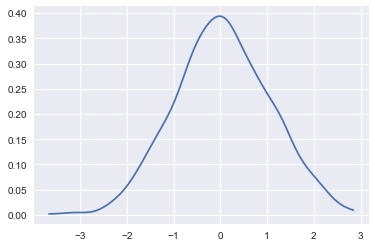

In [20]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace

testData = np.random.randn(1000)  ## Create Random Data; this numpy function will create a random normal distribution for us

gaussKDE = gaussian_kde(testData)

dist_space = linspace(min(testData), max(testData), 100)

plt.plot(dist_space, gaussKDE(dist_space))

Plotting the Probability Mass Function. We'll use the same test data from above

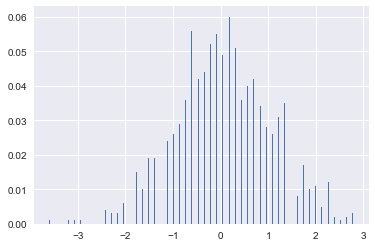

In [27]:
num_bins = 50

## Set the Number of bins to create the PMF. 
counts, bins = np.histogram(testData, bins=num_bins)
bins = bins[:-1] + (bins[1] - bins[0])/2

prob = counts/float(counts.sum())

## Create the chart
plt.bar(bins, prob, 1.0/num_bins)
plt.show()

## Bayes Rule and Bayesian Statistics

Bayes Rule allows us to calculate the conditional probability of an event happening by inverting the conditions of the events.

### $$P\left(\;A\;|\;B\;\right) = \frac{P\left(\;B\;|\;A\;\right)P\left(\;A\;\right)}{P(\;B\;)}$$



Recall that there are two schools of thought surrounding how to view statistics: 

**Frequentists** believe the "true" distribution is fixed (and not known). We can gain more insight into the "true" distribution by utilizing sampling techniques, testing for effects, and studying relevant parameters of the distribution. 

**Bayesians** believe that data informs us about the distribution, and as we receive more data our view of the distribution can be updated, further confirming or denying our previous beliefs. Bayesian oberservations are never "certain."

In AI applications, we typically take the Bayesian view of statistics


In [32]:
p_diseasePos = 0.8 ## Chance of having the disease given a positive result
p_diseaseNeg = 0.2 ## Chance of having the disease given a negative result

p_noPos = 0.096
p_noNeg = 0.904

p_FalsePos = (.80 * .01) + (.096 * .99)

p_disease_given_pos = (.80 * .01) / p_FalsePos

print(p_disease_given_pos)

0.07763975155279504


## Supervised Learning

Supervised algorithms rely on human knowledge to complete their tasks; they require labeled data that contains a target variable. For example, the data shown below is one of the most famous toy datasets for machine learning, the Iris Dataset. It shows four features - Sepal Length, Sepal Width, Petal Length, and Petal Width. In this dataset, our target variable (sometimes called label) is species. First, Let's load the dataset and take a look:

In [10]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We need to preprocesses our data by encoded the target labels before we can feed it into the random forest. First, we'll split our datasets into features and labels, and then encode the labels utilizing SkLearn's built in label encoder.

In [57]:
from sklearn import preprocessing

labels = df['species']
features = df.iloc[:,0:3]

le = preprocessing.LabelEncoder()
labelsEnc = le.fit_transform(labels)

Now, we can fit the classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, labelsEnc, test_size = 0.25, random_state = 50)

rf_classifier = RandomForestClassifier(n_estimators=1000) 
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Let's see how out model did; we can predict off of the x_test features data that we have, and assign the encoded labels back to the iris dataset labels.

In [68]:
preds = iris.target_names[rf_classifier.predict(x_test)]
preds

array(['versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'versicolor',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'setosa', 'versicolor', 'versicolor'], 
      dtype='<U10')

Lastly, we can create a confusion matrix to test how we did.

In [70]:
pd.crosstab(iris.target_names[y_test], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,11,0,0
versicolor,0,13,2
virginica,0,1,11


## Unsupervised Learning

Principal Component Analysis, or PCA, is an unsupervised method for feature extraction. It combines the input variables in a way so that we may drop the variables that provides the least amount of information to us. 

In [88]:
pcaData = pd.read_csv('/users/patricksmith/desktop/demographics.csv')

In [99]:
demData = pcaData[['health','income','stress']]
demData = (demData - demData.mean()) / demData.std()

demData_corr = np.corrcoef(demData.values.T)
demData.corr()

,health,income,stress
health,1.000000,0.192037,0.527663
income,0.192037,1.000000,-0.347925
stress,0.527663,-0.347925,1.000000


In [100]:
eig_vals, eig_vecs = np.linalg.eig(demData_corr)
print(eig_vals)
print(eig_vecs)

[ 0.26996948  1.55645677  1.17357375]
[[ 0.59525118 -0.6187659  -0.5126449 ]
 [-0.46791364  0.25173885 -0.84716255]
 [-0.65324793 -0.74414804  0.13968116]]


In [80]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

[  51.88189228   91.00101735  100.        ]


In [101]:
value_vector_pairs = [[eig_vals[i], eig_vecs[:,i]] for i in range(len(eig_vals))]
value_vector_pairs.sort(reverse=True)

In [102]:
weight_2d_projection = np.hstack((value_vector_pairs[0][1].reshape(eig_vecs.shape[1],1),
                                  value_vector_pairs[1][1].reshape(eig_vecs.shape[1],1)))

print('Weight data 2d PCA projection matrix:\n', weight_2d_projection)

Weight data 2d PCA projection matrix:
 [[-0.6187659  -0.5126449 ]
 [ 0.25173885 -0.84716255]
 [-0.74414804  0.13968116]]


In [103]:
Z = demo_noage.dot(weight_2d_projection)

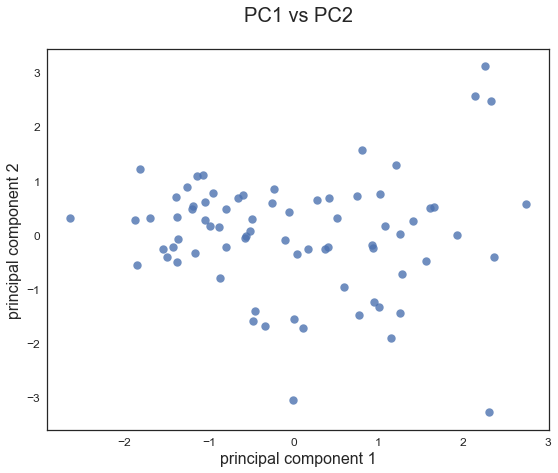

In [105]:
fig = plt.figure(figsize=(9,7))

ax = fig.gca()
ax = sns.regplot(Z.iloc[:,0], Z.iloc[:,1],
                 fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('principal component 2', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()


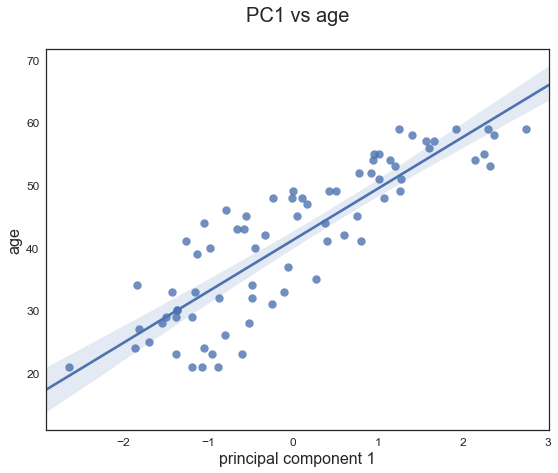

In [106]:
fig = plt.figure(figsize=(9,7))
ax = fig.gca()
ax = sns.regplot(Z.iloc[:,0], pcaData.age.values,
                 fit_reg=True, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('age', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs age\n', fontsize=20)

plt.show()